<a href="https://colab.research.google.com/github/RoseJaisil/Pink_detector/blob/main/Pink_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from io import BytesIO
from PIL import Image
from google.colab import files
from matplotlib import pyplot as plt

In [28]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

In [29]:
img = upload_files()

Saving image_!.jpg to image_!.jpg


In [48]:
img = cv2.imread("image_!.jpg")# filename
# convert to hsv colorspace
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# lower bound and upper bound for Green color
lower_bound = np.array([125,10,70])	 
upper_bound = np.array([175,255,255])

# find the colors within the boundaries
mask = cv2.inRange(hsv, lower_bound, upper_bound)

In [49]:
#define kernel size  
kernel = np.ones((5,5),np.uint8)

# Remove unnecessary noise from mask

mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

In [50]:
# Segment only the detected region
segmented_img = cv2.bitwise_and(img, img, mask=mask)

Text(0.5, 1.0, 'Second')

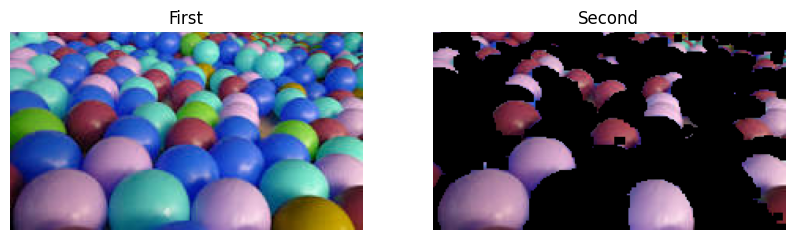

In [51]:
# create figure
fig = plt.figure(figsize=(10, 7))

# Adds a subplot at the 1st position
fig.add_subplot(1, 2, 1)
  
# showing image
plt.imshow(img)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
  
# showing image
plt.imshow(segmented_img)
plt.axis('off')
plt.title("Second")